色の情報から「オレンジか否か」(0：オレンジ、1：オレンジじゃない)を判定するAI

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

%matplotlib inline

pd.options.display.max_columns = None

In [39]:
dataset_base = pd.read_csv("citrus.csv")
dataset_base.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [40]:
dataset = dataset_base[['name', 'red', 'green', 'blue']]

dataset.head()

,name,red,green,blue
0,orange,172,85,2
1,orange,166,78,3
2,orange,156,81,2
3,orange,163,81,4
4,orange,161,72,9


In [41]:
is_orange = (dataset['name'] == 'orange').astype(np.int64)

# datasetに追加
dataset['is_orange'] = is_orange
dataset.head()

<ipython-input-41-512d3844a7a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['is_orange'] = is_orange


,name,red,green,blue,is_orange
0,orange,172,85,2,1
1,orange,166,78,3,1
2,orange,156,81,2,1
3,orange,163,81,4,1
4,orange,161,72,9,1


In [42]:
print("Y:", Y.shape)
print("X:", X.shape)

Y: (10001,)
X: (10001, 3)


In [43]:
Y = np.array(dataset['is_orange'])
X = np.array(dataset[['red', 'green', 'blue']])

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [45]:
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (4900,) , X_train= (4900, 3)
Y_valid= (2100,) , X_valid= (2100, 3)
Y_test= (3000,) , X_test= (3000, 3)


In [46]:
model = keras.Sequential()

model.add(Dense(8, activation='relu', input_shape=(3,)))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = "rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [48]:
%%time

log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         min_delta=0, patience=100,
                                                         verbose=1)],
                           validation_data=(X_valid, Y_valid))

Epoch 1/5000
154/154 [==============================] - 0s 2ms/step - loss: 1.2572 - accuracy: 0.6776 - val_loss: 0.9485 - val_accuracy: 0.6652
Epoch 2/5000
154/154 [==============================] - ETA: 0s - loss: 0.6479 - accuracy: 0.70 - 0s 2ms/step - loss: 0.6443 - accuracy: 0.7043 - val_loss: 0.6090 - val_accuracy: 0.7152
Epoch 3/5000
154/154 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.7176 - val_loss: 0.6826 - val_accuracy: 0.6738
Epoch 4/5000
154/154 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.7188 - val_loss: 0.9979 - val_accuracy: 0.5286
Epoch 5/5000
154/154 [==============================] - 0s 2ms/step - loss: 0.5633 - accuracy: 0.7245 - val_loss: 0.5091 - val_accuracy: 0.7552
Epoch 6/5000
154/154 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.7171 - val_loss: 0.6034 - val_accuracy: 0.7038
Epoch 7/5000
154/154 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy:

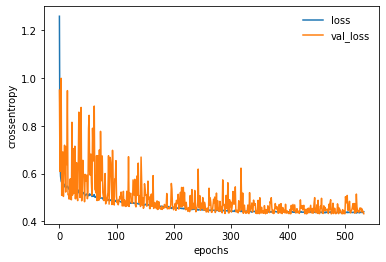

In [49]:
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False)
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()

In [50]:
Y_pred = model.predict(X_test)

Y_pred_cls = (Y_pred > 0.5).astype("int32")

In [51]:
Y_pred

array([[0.4223351 ],
       [0.8354266 ],
       [0.32314324],
       ...,
       [0.11160174],
       [0.20345396],
       [0.08380967]], dtype=float32)

In [52]:
Y_pred_cls

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [53]:
Y_pred_ = Y_pred_cls.reshape(-1)

In [54]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1489
           1       0.81      0.80      0.80      1511

    accuracy                           0.80      3000
   macro avg       0.80      0.80      0.80      3000
weighted avg       0.80      0.80      0.80      3000

